# Análise de Dados - Netflix

Para esse Business Case, vamos utilizar uma base de dados disponibilizada pela Netflix.

Sua tarefa é utilizar os conhecimentos adquiridos até agora para responder as perguntas abaixo.

O arquivo da base de dados está dispnível para download e também no site Kaggle.

[Link da base de dados - Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

# Carregamento e tratamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix.csv", converters={'date_added' : str.strip}, parse_dates=["date_added"])


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [4]:
df_tratado = df.copy()

In [5]:
df_tratado.columns = ['show_id', 'tipo', 'titulo', 'diretor', 'elenco', 'pais', 'dt_add',
       'ano_lancamento', 'classificacao', 'duracao', 'listed_in', 'description']

## 1 - Quantos registros e quantas colunas existem no dataset?

In [6]:
linhas, colunas = df_tratado.shape
print(f'Total de linhas {linhas}.')
print(f'Total de colunas {colunas}.')

Total de linhas 8807.
Total de colunas 12.


## 2- Existem colunas com valores ausentes? Quais?
diretor, elenco, pais, dt_add, classificacao e duracao

In [7]:
df_tratado.isnull().sum()

show_id              0
tipo                 0
titulo               0
diretor           2634
elenco             825
pais               831
dt_add              10
ano_lancamento       0
classificacao        4
duracao              3
listed_in            0
description          0
dtype: int64

In [8]:
df_tratado.isnull().sum() / linhas * 100

show_id            0.000000
tipo               0.000000
titulo             0.000000
diretor           29.908028
elenco             9.367549
pais               9.435676
dt_add             0.113546
ano_lancamento     0.000000
classificacao      0.045418
duracao            0.034064
listed_in          0.000000
description        0.000000
dtype: float64

## 3 - Quantas séries (TV Show) e quantos filmes (Movie) estão disponíveis?

In [9]:
df_tratado.tipo.value_counts()

tipo
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [10]:
df_tratado.tipo.value_counts(normalize=True) * 100

tipo
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

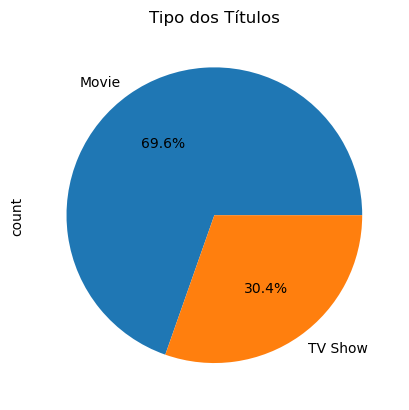

In [11]:
df_tratado.tipo.value_counts().plot(kind='pie',title='Tipo dos Títulos', autopct='%1.1f%%');

## 4 - Quantos registros no dataset estão sem o país especificado? Liste os seus tipos (filme ou série de tv) e quantidades.

In [12]:
df_semn_pais= df_tratado.loc[df_tratado['pais'].isnull()]

In [13]:
df_semn_pais['tipo'].value_counts()

tipo
Movie      440
TV Show    391
Name: count, dtype: int64

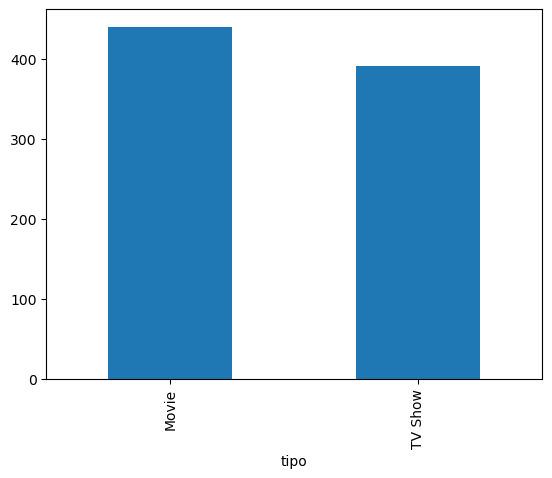

In [14]:
df_semn_pais['tipo'].value_counts().plot(kind='bar');

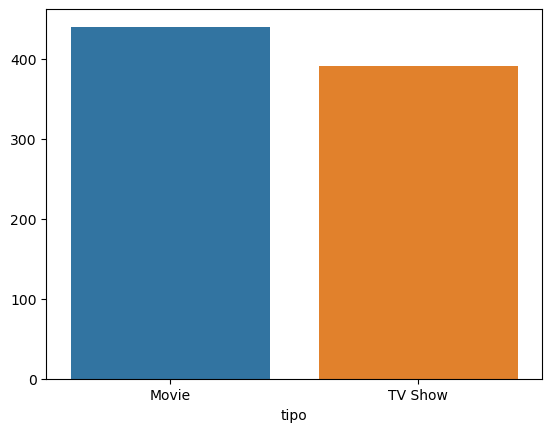

In [15]:
sns.barplot(x=df_semn_pais['tipo'].value_counts().index, y=df_semn_pais['tipo'].value_counts().values);

## 5 - Qual a data do primeiro filme disponibilizado e qual o seu título e país?
A data do primeiro filme disponibilizado em 01/01/2008. Seu título é: To and From New York. País de origem: USA

In [16]:
df_movies = df_tratado.loc[df_tratado['tipo'] == 'Movie']
df_movies['dt_add'].min()

Timestamp('2008-01-01 00:00:00')

In [17]:
filtro = df_movies['dt_add'] == df_movies['dt_add'].min()
df_movies[filtro]

,show_id,tipo,titulo,diretor,elenco,pais,dt_add,ano_lancamento,classificacao,duracao,listed_in,description
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."


## 6 - Qual o diretor com maior número de títulos (filme ou série)? Qual o seu país?

In [18]:
df_tratado.head()

,show_id,tipo,titulo,diretor,elenco,pais,dt_add,ano_lancamento,classificacao,duracao,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
df_tratado.diretor.value_counts()

diretor
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [20]:
pergunta6 = df_tratado.diretor.value_counts()
max_name = pergunta6.idxmax()
max_value = pergunta6.max()

print(f"O diretor com maior número de títulos é {max_name}, com {max_value} títulos!")

filtrodir = df_tratado['diretor'] == max_name
pais_diretor = df_tratado[filtrodir]['pais'].dropna().unique()[0]

print(f"O país do diretor é {pais_diretor}!")


O diretor com maior número de títulos é Rajiv Chilaka, com 19 títulos!
O país do diretor é India!


In [21]:
display(pais_diretor)

'India'

## 7 - Qual é o filme de maior duração? E o de menor duração?

O filme de maior duração é: **The School of Mischief** e o de menor duração é o Silent!


In [22]:
df_movie_tratado = df_tratado.query('tipo == "Movie"').copy()

In [23]:
df_movie_tratado.loc[df_movie_tratado["duracao"].isnull()]

,show_id,tipo,titulo,diretor,elenco,pais,dt_add,ano_lancamento,classificacao,duracao,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [24]:
df_movie_tratado.loc[[5541,5794,5813],"duracao"] = ["74 min","84 min","66 min"]

In [25]:
df_movie_tratado.loc[[5541,5794,5813]]

,show_id,tipo,titulo,diretor,elenco,pais,dt_add,ano_lancamento,classificacao,duracao,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [26]:
df_movie_tratado.loc[[5541,5794,5813],"classificacao"] = np.nan

In [27]:
df_movie_tratado.loc[[5541,5794,5813]]

,show_id,tipo,titulo,diretor,elenco,pais,dt_add,ano_lancamento,classificacao,duracao,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [28]:
df_movie_tratado['duracao_min'] = df_movie_tratado['duracao'].str.replace(' min', '').astype(np.int64)

In [29]:
df_movie_tratado.head()

,show_id,tipo,titulo,diretor,elenco,pais,dt_add,ano_lancamento,classificacao,duracao,listed_in,description,duracao_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [30]:
df_movie_tratado['duracao_min'].max()

312

In [32]:
df_movie_tratado['duracao_min'].sort_values(ascending=False)

4253    312
717     273
2491    253
2487    237
2484    233
       ... 
3535     10
1557      9
1484      8
2713      5
3777      3
Name: duracao_min, Length: 6131, dtype: int64

In [36]:
df_movie_tratado.loc[2491]

show_id                                                       s2492
tipo                                                          Movie
titulo                                       The School of Mischief
diretor                                      Houssam El-Din Mustafa
elenco            Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...
pais                                                          Egypt
dt_add                                          2020-05-21 00:00:00
ano_lancamento                                                 1973
classificacao                                                 TV-14
duracao                                                     253 min
listed_in                    Comedies, Dramas, International Movies
description       A high school teacher volunteers to transform ...
duracao_min                                                     253
Name: 2491, dtype: object

In [39]:
df_movie_tratado['duracao_min'].sort_values()

3777      3
2713      5
1484      8
1557      9
3535     10
       ... 
2484    233
2487    237
2491    253
717     273
4253    312
Name: duracao_min, Length: 6131, dtype: int64

In [40]:
df_movie_tratado.loc[3777]

show_id                                                       s3778
tipo                                                          Movie
titulo                                                       Silent
diretor                           Limbert Fabian, Brandon Oldenburg
elenco                                                          NaN
pais                                                  United States
dt_add                                          2019-06-04 00:00:00
ano_lancamento                                                 2014
classificacao                                                  TV-Y
duracao                                                       3 min
listed_in                Children & Family Movies, Sci-Fi & Fantasy
description       "Silent" is an animated short film created by ...
duracao_min                                                       3
Name: 3777, dtype: object

## 8 - Qual o tempo médio de duração de um filme?
O tempo médio de um filme é de **99** min!

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


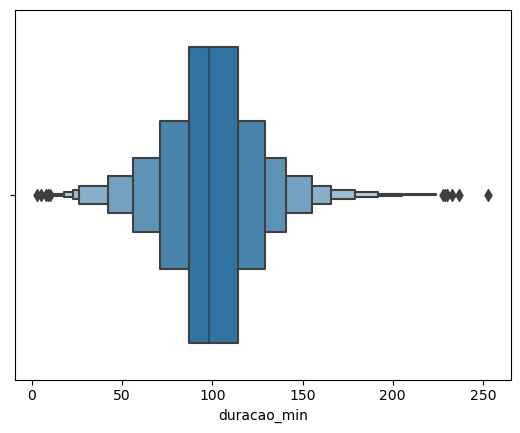

In [55]:
sns.boxenplot(x=df_movie_tratado['duracao_min']);

In [54]:
df_movie_tratado['duracao_min'].sort_values(ascending=False)

2491    253
2487    237
2484    233
2488    230
166     229
       ... 
3535     10
1557      9
1484      8
2713      5
3777      3
Name: duracao_min, Length: 6131, dtype: int64

In [50]:
df_movie_tratado.loc[4253, 'duracao_min']

90

In [53]:
df_movie_tratado.loc[717, 'duracao_min']

15

In [57]:
df_movie_tratado['duracao_min'].describe().round(2)

count    6131.00
mean       99.49
std        28.09
min         3.00
25%        87.00
50%        98.00
75%       114.00
max       253.00
Name: duracao_min, dtype: float64

In [59]:
round(df_movie_tratado['duracao_min'].mean(),2)

99.49

## 9 - Liste os 3 países que produzem a maior quantidade de Séries (TV Show).

Resposta: Os 3 países que mais produzem séries de TV são: Estados Unidos, Reino Unido e Japão.

In [68]:
df_tratado.loc[df_tratado['tipo'] == 'TV Show','pais'].value_counts(dropna=True)

pais
United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: count, Length: 196, dtype: int64

## 10 - Em qual ano  temos o maior número de séries e filmes brasileiros disponibilizados na Netflix?

In [73]:
df_brasil = df_tratado.loc[df_tratado["pais"].notna() & df_tratado["pais"].str.contains("Brazil")].copy()

In [77]:
df_brasil['dt_add'].dt.year.value_counts()

dt_add
2020    27
2019    22
2018    19
2017    16
2021    11
2016     2
Name: count, dtype: int64

Text(0.5, 1.0, 'Lançamentos por Ano Brasil')

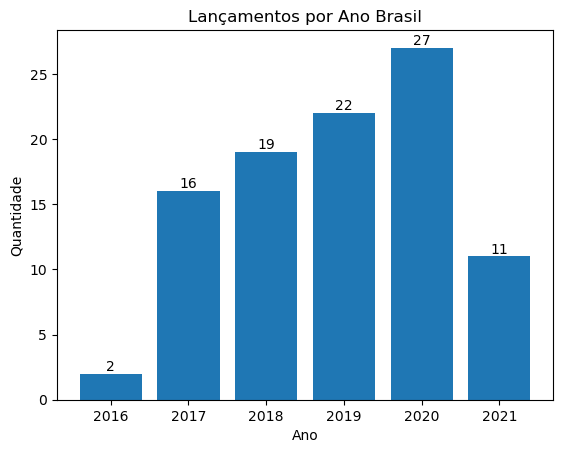

In [101]:
lancamentos_br = df_brasil['dt_add'].dt.year.value_counts().sort_index()

anos_br = lancamentos_br.index.tolist()
valores_br = lancamentos_br.values.tolist()

plt.bar(anos_br, valores_br)

for i, valor in enumerate(valores_br):
    plt.text(anos_br[i], valor, str(valor), ha='center', va='bottom')


plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Lançamentos por Ano Brasil')

plt.show()

In [95]:
lancamentos_br.values

array([ 2, 16, 19, 22, 27, 11], dtype=int64)

## 11 - Qual(ais) o(s) diretor(es) brasileiro(s) com o maior número de títulos (filme/série)?

Resposta: Os diretores brasileiros com maior número de títulos são: **Lucas Margutti** e **Diego Pignataro**.

In [107]:
df_brasil['diretor'].value_counts()

diretor
Lucas Margutti                  3
Diego Pignataro                 3
Marcelo Galvão                  2
Alexandre Avancini              2
Bruno Garotti                   2
                               ..
Petra Costa, Lea Glob           1
Wagner de Assis                 1
Fernando Ayllón                 1
Cavi Borges, Luciano Vidigal    1
Tiffanie Hsu                    1
Name: count, Length: 61, dtype: int64

## 12 - Existem mais conteúdos para adultos ou para crianças e adolescentes?

Resposta: Existem mais conteúdos para crianças e adolescentes. Total de 4.702 títulos.

In [110]:
df_tratado['classificacao'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [112]:
adultos = ['TV-MA', 'NR', 'R']
crianca_adolescente = ['TV-14','TV-PG', 'PG-13', 'TV-Y7', 'TV-Y', 'PG' , 'TV-G', 'G' ]

In [116]:
#adulto
df_tratado.query('classificacao in @adultos').shape

(4086, 12)

In [117]:
#criança/adolescente
df_tratado.query('classificacao in @crianca_adolescente').shape

(4702, 12)